**Table of contents**<a id='toc0_'></a>    
- [**Scatter Charts**](#toc1_)    
- [**Heatmap**](#toc2_)    
- [**Estimating Regression Fits**](#toc3_)    
  - [Caution](#toc3_1_1_1_)    
  - [*Functions for plotting linear regression models*](#toc3_2_)    
  - [*Fitting simple linear regression model to the data*](#toc3_3_)    
  - [*Verify if simple linear regression is appropriate for the data and change the order of the regression model accordingly*](#toc3_4_)    
  - [*Robust regression*](#toc3_5_)    
  - [*Logistic regression*](#toc3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

# Visualizing relations between two or more numeric variables in a dataset

<i> Relational charts are used for displaying multivariate data (data with two or more numeric variables) and understanding how variables in a dataset relate to each other and how those relationships depend on other variables. 

These  charts show how one or more variables relates to other variables.

**Note**: The data should be time independent.

- **Questions:**
1. Is the relationship positive, negative, or neither?
2. How are x and y related to each other?
3. What makes one group or cluster different from another?

- **Insight:** use to show - outliers, correlations, positive, and negative relationships among two or more variables.

- **Data:** two or more numeric variables.

- **Chart options:** scatterplot, scatterplot matrix, bubble chart, parallel coordinates, radar, bullet, and a heat map. </i>

> The `seaborn.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind={'scatter' | 'line'}, height=5, aspect=1, facet_kws=None, **kwargs)` function provides a unified interface to generate different types of relational plots (either a scatter plot or a line plot). This is very useful to quickly switch between different visual representations of the data and see what works best. Also similar to other unified seaborn plotting functions it takes in 'row' and 'col' arguments and provides a convenient way to generate separate plots for different subsets of the data. 
>
>> See the detailed documentation @https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

<u>Function Parameters</u>

- `data:` DataFrame (dataset for plotting).
- `x, y, hue:` names of variables in data.
- `row, col:` Categorical variables in data that will determine the faceting of the grid (used for creating matrix of bar plots).
- `col_wrap (int):` “Wrap” the column variable at this width, so that the column facets span multiple rows. Ignored if row facet is defined.
- `height:` Height (in inches) of each facet.
- `aspect:` Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.
- `palette:` string, list, dict, or matplotlib.colors.Colormap. Method for choosing the colors to use when mapping the hue semantic. See the documentation @https://seaborn.pydata.org/tutorial/color_palettes.html Or, to have a view of how each of the 170 available color maps looks see @https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f . 

**Returns:** Returns a FacetGrid object with the plot on it for further tweaking.

## <a id='toc1_'></a>[**Scatter Charts**](#toc0_)

`->` Some Common Types of Scatter Charts are,
    
1. **Scatterplot:** Usually scatterplots are used to show relationships between two variables (x, y) using a cloud of points, where each point represents an observation in the dataset. This allows us to infer if there are any meaningful relationship between the variables, at a glance.
    - Use to show positive or negative correlations, or linear and nonlinear relationships between  variables.
    - Labeling of every data point reduces readability but increases interpretation. So, label only a few that you want your audience to focus on.

2. **Scatterplot matrix:** Scatterplot matrices help identify a correlation between multiple variables. It makes it easy to observe the relationship between pairs of variables in one set of plots.

3. **Bubble chart:** A bubble chart is a scatterplot that shows relationships between three or four variables. 
    - The position of the bubble shows the relationship between the x and y variables.
    - The bubble size is based upon a numerical variable, such as population, or sales.
    - The bubble color is best reserved for categorical data, such as region.

    Bubble charts are best when the bubble sizes vary significantly.

`->` When to use Scatter Charts
- **To show** patterns in large sets of data, **linear or non-linear trends, correlations, clusters, or outliers**.
- **To compare** large number of data points **without regard to time**.
- To present relationships, but not exact values for comparisons.
- If the order of points in the dataset is not essential.

`->` When to avoid Scatter Charts
- If you have a **small dataset**.
- If the **values** in your dataset are **not correlated**.

`->` Tips for using Scatter Charts
- If applicable turn the horizontal axis into a logarithmic scale, thus showing the relationships between more widely distributed elements.

> We can use the `seaborn.scatterplot(data=None, x=None, y=None, hue=None, size=None, style=None, palette=None, sizes=None, markers=True, legend='auto', ax=None, **kwargs)` function to draw a scatterplot in seaborn. One advantage of this method is that it returns the matplotlib Axes containing the plot. As a result it's easier to modify the plot using matplotlib. Also, this function can receive a pre-existing axes for plotting. 
>
>> See the documentation @https://seaborn.pydata.org/generated/seaborn.scatterplot.html.

In Seaborn these two-dimensional graphics (i.e, the scatter plots) can be enhanced by mapping up to `three additional variables` using the semantics of,

- `hue:` Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
- `size:` Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.
- `style:` Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.

The relationship between x and y can be shown for different subsets of the data using the *hue, size, and style* parameters. These parameters control what visual semantics are used to identify the different subsets. 

In [3]:
# Loading in an example dataset
restaurant_tips = sns.load_dataset("tips")
restaurant_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


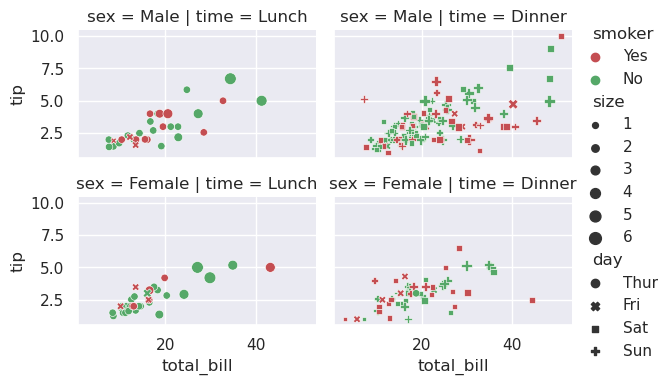

In [4]:
# exapmle of scatter plot
fig = sns.relplot(
    restaurant_tips,
    kind="scatter",
    x="total_bill",
    y="tip",
    hue="smoker",
    style="day",
    size="size",
    row="sex",
    col="time",
    hue_order=("Yes", "No"),
    palette=["r", "g"],
    height=2,
    aspect=1.5,
)

## <a id='toc2_'></a>[**Heatmap**](#toc0_)

`->` A **heat map** is a graphical representation of a **table** of data. The individual values are arranged in a table matrix and represented by colors.

To represent more common values or higher activities brighter colors (usually, reddish colors) are used and to represent less common or activity values, darker colors are preferred. 

**The gradual change from one color to another depicts the relationship between the variables in the form of a color pattern (that is if theres any relationship at all).**

> Heatmaps in Seaborn can be plotted by using the `seaborn.heatmap()` function. 
> 
>> See the documentation @https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

<u>Function Parameters:</u>

- `data:` 2D dataset that can be coerced into an ndarray.
- `vmin, vmax:` Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
- `cmap:` The mapping from data values to color space. See the documentation @https://seaborn.pydata.org/tutorial/color_palettes.html Or, to have a view of how each of the 170 available color maps looks see @https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f .
- `center:` The value at which to center the colormap when plotting divergent data.
- `cbar:` Whether to draw a colorbar.
- `annot:` If True, write the data value in each cell.
- `fmt:` String formatting code to use when adding annotations.
- `linewidths:` Width of the lines that will divide each cell.
- `linecolor:` Color of the lines that will divide each cell.

In [5]:
# loading example dataset

In [6]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
mpg_1 = (
    mpg.pivot_table(
        index="model_year",
        values=["cylinders", "horsepower", "weight", "acceleration"],
        aggfunc="median",
    )
    .assign(weight=lambda df_: df_.weight / 1000)
    .rename({"weight": "weight (ton)"}, axis="columns")
)
mpg_1.head()

,acceleration,cylinders,horsepower,weight (ton)
model_year,,,,
70,12.5,8.0,150.0,3.4490
71,14.5,6.0,95.0,2.7980
72,14.5,4.0,104.5,2.9560
73,14.0,7.0,129.5,3.3385
74,16.0,4.0,88.0,2.4890


- ##### Plotting a heatmap

<Axes: ylabel='model_year'>

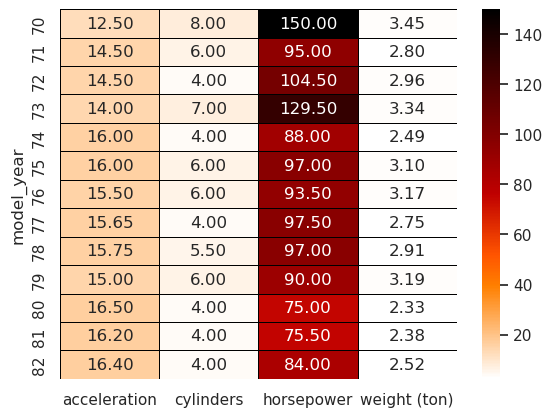

In [8]:
sns.heatmap(
    mpg_1,
    annot=True,
    fmt=".2f",
    cmap="gist_heat_r",
    linewidths=0.5,
    linecolor="Black",
)

`This heatmap doesn't make much sense.` There are two reasons for that:


1. If you think about it, Acceleration is mostly related to HP (Horsepower) than to a cars weight or number of cylinders. Also, HP is directly related to Cylinder numbers and is not to the Weight (The weight of a car does not directly determine the horsepower an engine produces. Instead, weight affects how efficiently the car can use the available horsepower to accelerate). In summation, it is your duty to understand the relation between different variables in your data before you go present them in front of someone else. Also when presenting to others consider mentioning that this heatmap is supposed to represent the correlation between these columns and discuss the direction of these relationships (positive or negative). Additionally, assess whether these correlations are statistically significant (remember that, *correlation doesn't mean causation*).

2. The HP column has very large values compared to the other columns. It's effect can be seen in all the columns of the heatmap. Especially in the Weight (Ton) column, all squares are white, and you can't deduce how it's related to other factors. Also, all the cells in the Acceleration column seems to be the same shade or orange (as a result the relationship between HP and acceleration isn't captured very well in the heatmap). All this is to say that, you need to be careful about the range of values each column represents and what it means for the other columns. In such situations it is a good choice to normalize/scale the data before presenting. Normalizing or scaling the data could help ensure that variables with different scales contribute equally to the analysis. Additionally, consider discussing the color scale used in the heatmap and also consider other analysis techniques like scatterplots or regression to gain a better understanding of the data relationships.

- ##### Plotting a correlation heatmap

In [9]:
mpg_corr = mpg_1.corr()

In [10]:
mpg_corr

,acceleration,cylinders,horsepower,weight (ton)
acceleration,1.000000,-0.765218,-0.910980,-0.767695
cylinders,-0.765218,1.000000,0.780206,0.871824
horsepower,-0.910980,0.780206,1.000000,0.803340
weight (ton),-0.767695,0.871824,0.803340,1.000000


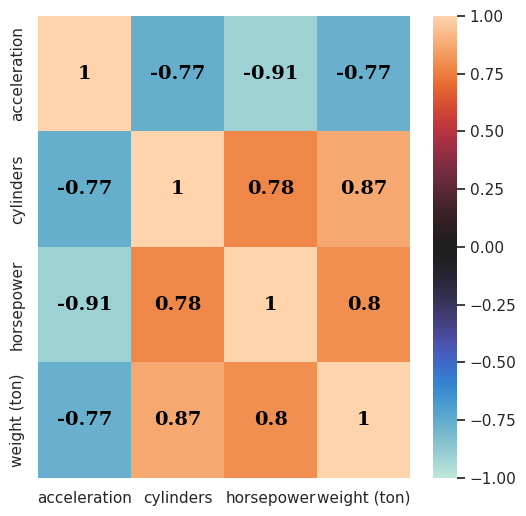

In [11]:
plt.figure(figsize=(6, 6))
sns.heatmap(
    mpg_corr,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    annot_kws={
        "fontsize": 14,
        "fontweight": "bold",
        "color": "black",
        "fontfamily": "serif",
    },
)
plt.show()

This correlation heatmap suggests that, Acceleration is negatively related to all 3 variables (which is true in a sense). But a large factor in that relationship is due to the fact that, with high cylinders count, the horsepower is high but it also increases the weight of car significantly.

## <a id='toc3_'></a>[**Estimating Regression Fits**](#toc0_)

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We already discussed scatter plots and heatmaps. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. We will do so through the common framework of linear regression.

##### <a id='toc3_1_1_1_'></a>[Caution](#toc0_)
Seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statistical libraries. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

### <a id='toc3_2_'></a>[*Functions for plotting linear regression models*](#toc0_)

> We can use the, `seaborn.lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', hue_order=None, col_order=None, row_order=None, legend=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)` function to draw a scatterplot and fit a regression model to it. 
> 
> >This function acts as a wrapper to the `seaborn.regplot()` and returns a FacetGrid Object. To draw the regression line on a single axis we can use the `seaborn.regplot()` function. 
>
>> See the tutorial @https://seaborn.pydata.org/tutorial/regression.html.

**Note:** The `sns.regplot()` and `sns.lmplot()` functions are similar but, 
- regplot() is an axes-level function, and lmplot() is a figure-level function
- regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas.Series objects, or as references to variables in a pandas.DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. 
- only lmplot() has *'hue'* as a parameter

### <a id='toc3_3_'></a>[*Fitting simple linear regression model to the data*](#toc0_)

In [12]:
restaurant_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


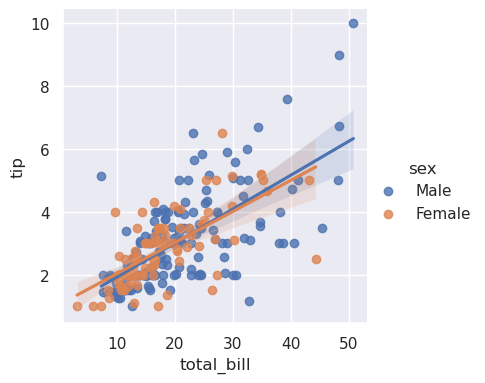

In [13]:
sns.lmplot(data=restaurant_tips, x="total_bill", y="tip", hue="sex", height=4)
plt.show()

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal.

>> In such cases one option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


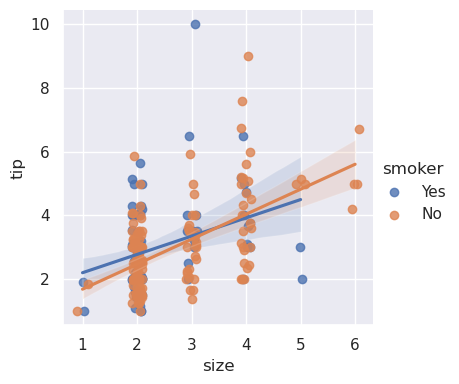

In [14]:
sns.lmplot(data=restaurant_tips, x="size", y="tip", hue="smoker", x_jitter=0.1, height=4)
plt.show()

>> A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


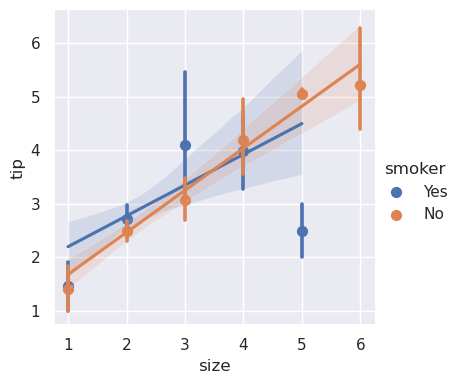

In [15]:
sns.lmplot(data=restaurant_tips, x="size", y="tip", hue="smoker", x_estimator=np.mean, height=4)
plt.show()

### <a id='toc3_4_'></a>[*Verify if simple linear regression is appropriate for the data and change the order of the regression model accordingly*](#toc0_)

> The `residplot(data=None, *, x=None, y=None, x_partial=None, y_partial=None, lowess=False, order=1, robust=False, dropna=True, label=None, color=None, scatter_kws=None, line_kws=None, ax=None)` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0. If there is structure in the residuals, it suggests that simple linear regression is not appropriate.
>
>> **Note:** This function can also be used to check if higher order polynomial regression models are appropriate for a dataset. Use the order parameter to explore which one is more appropriate (the residuals should be randomly distributed around y=0).
>
>> The function documentation can be found at, https://seaborn.pydata.org/generated/seaborn.residplot.html#seaborn.residplot.

In [16]:
anscombe = sns.load_dataset("anscombe")

In [17]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


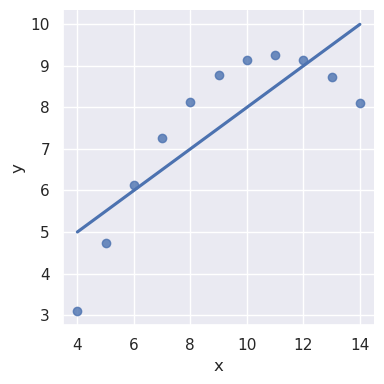

In [18]:
# first let's see if a linear regression model fits the data
sns.lmplot(data=anscombe[anscombe.dataset == "II"], x="x", y="y", ci=None, height=4)
plt.show()

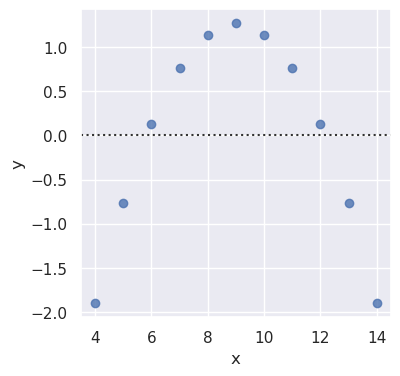

In [19]:
# clearly it doesn't quite capture the true relationship 
# let's inspect with residplot()
fig, ax = plt.subplots(figsize=(4, 4))
sns.residplot(data=anscombe[anscombe.dataset == "II"], x="x", y="y", ax=ax)
plt.show()

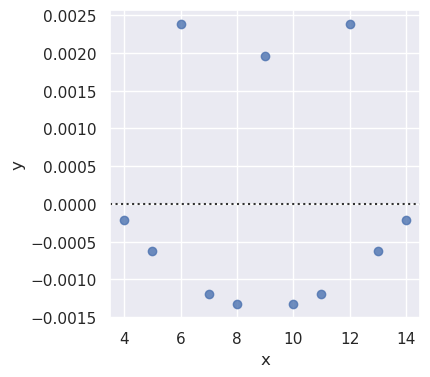

In [20]:
# let's inspect with order=2
fig, ax = plt.subplots(figsize=(4, 4))
sns.residplot(data=anscombe[anscombe.dataset == "II"], x="x", y="y", order=2, ax=ax)
plt.show()

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


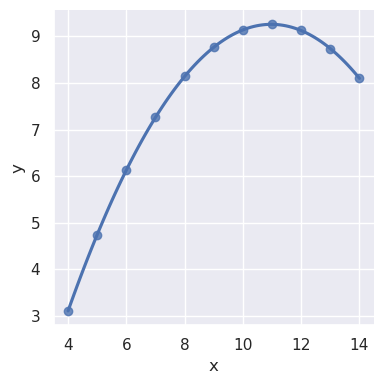

In [21]:
# let's see whether regression model of order 2 fits the data now
sns.lmplot(data=anscombe[anscombe.dataset == "II"], x="x", y="y", ci=None, order=2, height=4)
plt.show()

### <a id='toc3_5_'></a>[*Robust regression*](#toc0_)

A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study. In the presence of outliers, it can be useful to fit a robust regression (*use `robust=True`*), which uses a different loss function to downweight relatively large residuals.

**Note:** It is computationally intensive. So, use *ci=None* if not required.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


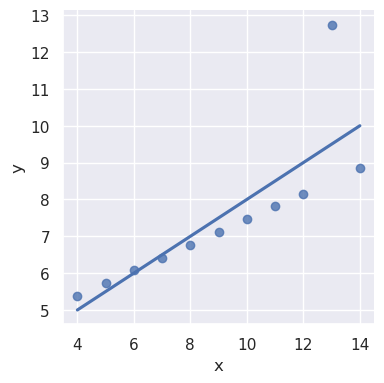

In [22]:
# normal linear regression model
sns.lmplot(data=anscombe[anscombe.dataset == "III"], x="x", y="y", ci=None, height=4)
plt.show()

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


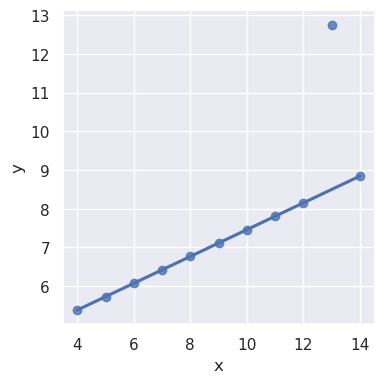

In [23]:
# with robust regression
sns.lmplot(data=anscombe[anscombe.dataset == "III"], x="x", y="y", ci=None, robust=True, height=4)
plt.show()

### <a id='toc3_6_'></a>[*Logistic regression*](#toc0_)

When the y variable is binary, simple linear regression also “works” but provides implausible predictions. The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x (*use `logistic=True`*).

**Note:** It is computationally intensive. So, use *ci=None* if not required.

In [24]:
# big tip if percentage of tip is > 15%
restaurant_tips["big_tip"] = (restaurant_tips.tip / restaurant_tips.total_bill) > 0.15

In [25]:
restaurant_tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


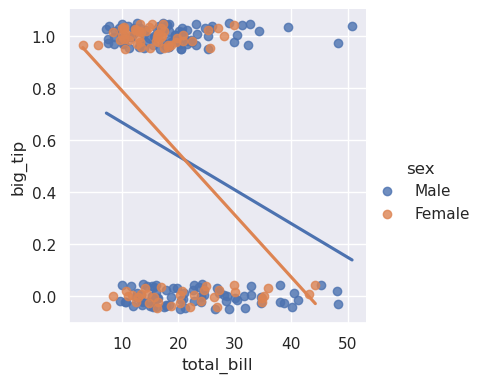

In [26]:
# fitting a normal linear regression model
sns.lmplot(data=restaurant_tips, x="total_bill", y="big_tip", hue="sex", height=4, ci=None, y_jitter=.05)
plt.show()

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


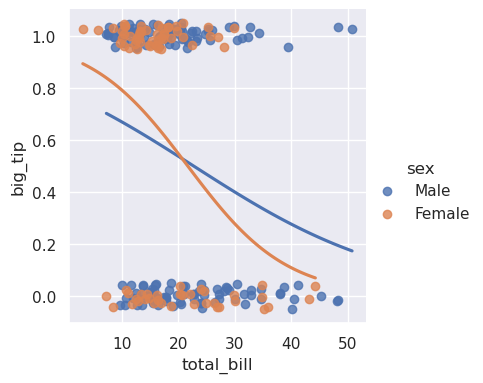

In [27]:
# using a logistic regression model
sns.lmplot(data=restaurant_tips, x="total_bill", y="big_tip", hue="sex", logistic=True, height=4, ci=None, y_jitter=0.05)
plt.show()